In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif"
})

In [11]:
dir_names = [
    'ae_002',
    'ae_003',
]

params_case = [
    'without params',
    'with params'
]

In [12]:
individual_errors = []

for i in range(len(dir_names)):
    fname = os.getcwd()+'/saved_ae/'+dir_names[i]+'/plots/individual_NRMSE_test.npz'
    with np.load(fname) as f:
        individual_errors.append(f['individual_NRMSE_test'])

In [13]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':17}

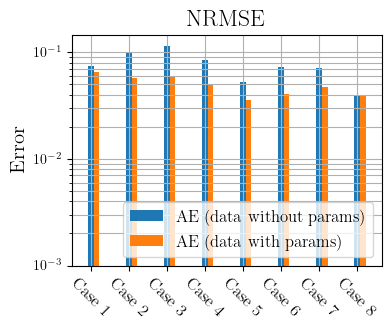

In [21]:
width = 0.15
ind = np.arange(individual_errors[0].shape[0])

bottom_cutoff = np.min([1e-3, np.min(individual_errors)])
plt.bar(ind, individual_errors[0], width, label='AE (data {})'.format(params_case[0]), bottom=bottom_cutoff)
plt.bar(ind+width, individual_errors[1], width, label='AE (data {})'.format(params_case[1]), bottom=bottom_cutoff)
plt.gca().set_yscale('log')
plt.grid(True, which='both')
# plt.xlabel('Number of Latent States', **xlabel_kwargs)
plt.ylabel('Error', **ylabel_kwargs)
plt.title('NRMSE', **title_kwargs)
plt.xticks(
    np.arange(individual_errors[0].shape[0]),
    [r'Case '+str(elem) for elem in np.arange(1, individual_errors[0].shape[0]+1)],
    rotation=270+45,
    **legend_kwargs
)
# plt.ylim([-0.05, 1.05])
plt.xlim(-0.5, ind[-1]+width+0.5)
plt.legend(**legend_kwargs, loc='lower right')

plt.gcf().set_size_inches(4,3)

plt.savefig(os.getcwd()+'/saved_ae/multiregime_AE_NRMSE.pdf', dpi=300, bbox_inches='tight')
plt.show()